<a href="https://colab.research.google.com/github/mhdiree/EDA_bigbatacamp/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%BA%A0%ED%94%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**개요 :**

현대 사회에서 범죄 예방은 중요한 사회과제 중 하나로 부각되고 있습니다. 이 연구는 서울의 자치구를 대상으로 "CCTV 대수가 많으면 범죄율이 낮아진다"는 가설을 검증하고자 합니다. CCTV의 보급이 범죄 예방에 어떤 영 미치는지를 밝혀내어, 도시 안전에 대한 정책적 결정에 기여하고자 합니다.

**배경 및 목적:**

과거의 연구에서는 CCTV가 범죄 예방에 효과적일 수 있다는 증거가 제시되었지만, 특정 지역에서의 실질적인 영향은 여전히 불분명한 측면이 있습니다. 또한 작년 무차별 흉기 난동과 테러 예고글 등의 범죄가 발생했고 올해 1월에도 정치인 피습 사건이 두 차례 발생하면서 시민 불안감이 커진 상태입니다. 이 과는 서울의 각 자치구에서 CCTV의 배치 상황과 범죄율 간의 관계를 분석하여, 보다 구체적이고 신뢰성 있는 결과를 도출하고자 합니다.

**가설:**

본 연구는 CCTV 대수가 증가할수록 범죄율이 낮아질 것으로 가설을 세웠습니다. 이를 통해 CCTV의 범죄 예방 효과를 확인하려 합니다.

**연구 방법:**

공공데이터포털의 데이터를 사용해 파이썬의 여러 라이브러리를 이용했습니다.

다음의 세 csv 파일데이터를 사용했습니다.

- 경찰청 서울특별시경찰청_경찰서별 5대범죄 발생 검거 현황(2022년 기준)
- 서울특별시_(안심이) CCTV 설치 현황(2021년 기준)
- 서울시 행정구역 (구별) 통계 (2022년 수정 완료)

다음의 세 파이썬 라이브러리를 사용했습니다

- 판다스
- 맷플롯
- seaborn

---

- 시각화에 사용한 파일명
    - cctv 설치 : cctv.csv
    - 범죄 발생 : crime.csv
    - df = ccctv.csv
    - df_crime = crime.csv

글자 파일 만들기
- 처음 들어가면 sudo부터 폰트 출력까지 실행
- 런타임 재시작 후 폰트 출력부터 재실행

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (15.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and direc

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%pip install matplotlib

In [ ]:
%pip install pandas

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/

In [ ]:
# 한글폰트 설정
##plt.rc('font', family='AppleGothic') # For MacOS

plt.rc('font', family='NanumMyeongjo')
print(plt.rcParams['font.family'])

['NanumMyeongjo']


In [ ]:
import pandas as pd

In [ ]:
pip install chardet


판다스, 맷플롯 이미 위에서 깔았음
파일 읽기시작
두 번째 것부터 실행

In [ ]:
import pandas as pd
import chardet  # Make sure to install this library using: pip install chardet

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# 파일의 인코딩 자동 감지
detected_encoding = detect_encoding('cctv.csv')

# 빈 데이터프레임 생성
df = pd.DataFrame()

# CSV 파일 읽기 시도
try:
    df = pd.read_csv('cctv.csv', encoding=detected_encoding)
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

# DataFrame 출력
print(df)


       자치구                                안심 주소       위도        경도  CCTV 수량  \
0      중랑구  중화2동 326-86 (주택가 골목삼거리)_C-JH02-0032  37.5977  127.0728        1   
1      중랑구        면목2동 146-1(고정3)_C-MM02-0013-C  37.5879  127.0812        1   
2      중랑구  중화2동 326-88 (골목길 통신주)_C-JH02-0032-1  37.5976  127.0727        1   
3      중랑구        면목2동 146-1(고정2)_C-MM02-0013-B  37.5879  127.0812        1   
4      중랑구       중화2동 327-27 (고정)_C-JH02-0044-A  37.5986  127.0747        1   
...    ...                                  ...      ...       ...      ...   
83729  강남구                           대치2-256-02  37.5059  127.0589        1   
83730  강남구                            수서-208-01  37.4902  127.1014        1   
83731  강남구                            수서-208-02  37.4902  127.1014        1   
83732  강남구                           대치2-256-03  37.5059  127.0589        1   
83733  강남구                            수서-208-03  37.4902  127.1014        1   

            수정 일시  
0      2022-12-01  
1      2022

시각화 시작 ----

<Axes: >

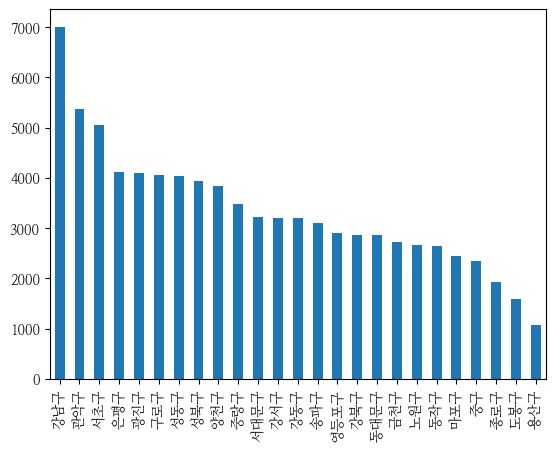

In [ ]:
df['자치구'].value_counts().plot(kind='bar')


In [ ]:
# 파일의 인코딩 자동 감지
detected_encoding = detect_encoding('crime.csv')

# 빈 데이터프레임 생성
df_crime = pd.DataFrame()

# CSV 파일 읽기 시도
try:
    df_crime = pd.read_csv('crime.csv', encoding=detected_encoding)
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

# DataFrame 출력
print(df_crime)

     구분     죄종 발생검거    건수
0    중부     살인   발생     1
1    중부     살인   검거     2
2    중부     강도   발생     3
3    중부     강도   검거     2
4    중부  강간,추행   발생   137
..   ..    ...  ...   ...
305  수서  강간,추행   검거   175
306  수서     절도   발생   930
307  수서     절도   검거   553
308  수서     폭력   발생  1268
309  수서     폭력   검거  1081

[310 rows x 4 columns]


In [ ]:
df_crime = df_crime.rename(columns={'구분' : '자치구'})
print(df_crime)

    자치구     죄종 발생검거    건수
0    중부     살인   발생     1
1    중부     살인   검거     2
2    중부     강도   발생     3
3    중부     강도   검거     2
4    중부  강간,추행   발생   137
..   ..    ...  ...   ...
305  수서  강간,추행   검거   175
306  수서     절도   발생   930
307  수서     절도   검거   553
308  수서     폭력   발생  1268
309  수서     폭력   검거  1081

[310 rows x 4 columns]


In [ ]:
#자치구에 따른 건수
#grouped_data = df_crime.groupby('자치구')['건수'].sum().reset_index()
#plt.figure(figsize=(12, 6))
#plt.bar(grouped_data['자치구'], grouped_data['건수'])
#plt.title('자치구별 범죄율')
#plt.xlabel('자치구')
#plt.ylabel('건수')
#plt.show()


In [ ]:
df_crime_sorted = df_crime.sort_values(by='자치구')
print(df_crime_sorted)


df_sorted = df.sort_values(by='자치구')
print(df_sorted)

    자치구     죄종 발생검거    건수
177  강남     절도   검거   654
178  강남     폭력   발생  2494
176  강남     절도   발생  1565
175  강남  강간,추행   검거   359
174  강남  강간,추행   발생   458
..   ..    ...  ...   ...
44   혜화  강간,추행   발생    86
45   혜화  강간,추행   검거    60
46   혜화     절도   발생   590
48   혜화     폭력   발생   740
47   혜화     절도   검거   283

[310 rows x 4 columns]
       자치구                                안심 주소       위도        경도  CCTV 수량  \
83733  강남구                            수서-208-03  37.4902  127.1014        1   
79054  강남구                           논현2-219-00  37.5101  127.0358        1   
79055  강남구                           도곡1-234-02  37.4887  127.0375        1   
79056  강남구                           역삼1-264-01  37.5058  127.0364        1   
79057  강남구                           개포4-402-00  37.4754  127.0529        1   
...    ...                                  ...      ...       ...      ...   
2309   중랑구       상봉2동 88-111(고정1)_C-SB02-0006-A  37.5947  127.0901        1   
2308   중랑구         신내1동 139 (봉화산

In [ ]:
# '발생검거' 열의 값이 '검거'인 행 삭제 (원본 데이터프레임 변경)
df_crime.drop(df_crime[df_crime['발생검거'] == '검거'].index, inplace=True)
print(df_crime)


    자치구     죄종 발생검거    건수
0    중부     살인   발생     1
2    중부     강도   발생     3
4    중부  강간,추행   발생   137
6    중부     절도   발생   910
8    중부     폭력   발생  1026
..   ..    ...  ...   ...
300  수서     살인   발생     6
302  수서     강도   발생     2
304  수서  강간,추행   발생   209
306  수서     절도   발생   930
308  수서     폭력   발생  1268

[155 rows x 4 columns]


In [ ]:
unique_jachigu = df['자치구'].unique()
unique_jachigu2 = df_crime['자치구'].unique()
print(unique_jachigu)
print(unique_jachigu2)

['중랑구' '중구' '종로구' '은평구' '용산구' '영등포구' '양천구' '송파구' '성북구' '성동구' '서초구' '서대문구'
 '마포구' '동작구' '동대문구' '도봉구' '노원구' '금천구' '구로구' '광진구' '관악구' '강서구' '강북구' '강동구'
 '강남구']
['중부' '종로' '남대문' '서대문' '혜화' '용산' '성북' '동대문' '마포' '영등포' '성동' '동작' '광진' '서부'
 '강북' '금천' '중랑' '강남' '관악' '강서' '강동' '종암' '구로' '서초' '양천' '송파' '노원' '방배'
 '은평' '도봉' '수서']


In [ ]:
# 두 리스트 정의
list1 = ['중랑', '중구', '종로', '은평', '용산', '영등포', '양천', '송파', '성북', '성동', '서초', '서대문구', '마포', '동작', '동대문', '도봉', '노원', '금천', '구로', '광진', '관악', '강서', '강북', '강동', '강남']
list2 = ['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포', '성동', '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동', '종암', '구로', '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서']

# 두 리스트의 교집합 찾기
common_jachigu = list(set(list1).intersection(set(list2)))

# 교집합 출력
print(common_jachigu)


['노원', '마포', '관악', '송파', '강동', '구로', '강북', '용산', '금천', '성동', '동작', '도봉', '강서', '강남', '서초', '은평', '성북', '광진', '종로', '양천', '동대문', '중랑', '영등포']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 교집합에 해당하는 자치구명 추출
common_jachigu = ['중랑', '종로', '은평', '용산', '영등포', '양천', '송파', '성북', '성동', '서초', '마포', '동작', '동대문', '도봉', '노원', '금천', '구로', '광진', '관악', '강서', '강북', '강동']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 교집합에 해당하는 자치구명 추출
common_jachigu = ['중랑', '종로', '은평', '용산', '영등포', '양천', '송파', '성북', '성동', '서초', '마포', '동작', '동대문', '도봉', '노원', '금천', '구로', '광진', '관악', '강서', '강북', '강동']

# 교집합에 해당하는 데이터 추출
df_common = df[df['자치구'].isin(common_jachigu)]
df_crime_common = df_crime[df_crime['자치구'].isin(common_jachigu)]
print(df_common)
print(df_crime_common)

Empty DataFrame
Columns: [자치구, 안심 주소, 위도, 경도, CCTV 수량, 수정 일시]
Index: []
    자치구     죄종 발생검거    건수
10   종로     살인   발생     2
12   종로     강도   발생     5
14   종로  강간,추행   발생   142
16   종로     절도   발생   723
18   종로     폭력   발생   847
..   ..    ...  ...   ...
290  도봉     살인   발생     3
292  도봉     강도   발생     0
294  도봉     강간   발생    70
296  도봉     절도   발생   969
298  도봉     폭력   발생  1099

[110 rows x 4 columns]


In [ ]:
common_jachigu = ['중랑', '종로', '은평', '용산', '영등포', '양천', '송파', '성북', '성동', '서초', '마포', '동작', '동대문', '도봉', '노원', '금천', '구로', '광진', '관악', '강서', '강북', '강동']


df.loc[df['자치구'] == '중랑구', '자치구'] = '중랑'
df.loc[df['자치구'] == '종로구', '자치구'] = '종로'
df.loc[df['자치구'] == '은평구', '자치구'] = '은평'
df.loc[df['자치구'] == '용산구', '자치구'] = '용산'
df.loc[df['자치구'] == '영등포구', '자치구'] = '영등포'
df.loc[df['자치구'] == '양천구', '자치구'] = '양천'
df.loc[df['자치구'] == '송파구', '자치구'] = '송파'
df.loc[df['자치구'] == '성북구', '자치구'] = '성북'
df.loc[df['자치구'] == '성동구', '자치구'] = '성동'
df.loc[df['자치구'] == '서초구', '자치구'] = '서초'
df.loc[df['자치구'] == '마포구', '자치구'] = '마포'
df.loc[df['자치구'] == '동작구', '자치구'] = '동작'
df.loc[df['자치구'] == '동대문구', '자치구'] = '동대문'
df.loc[df['자치구'] == '도봉구', '자치구'] = '도봉'
df.loc[df['자치구'] == '노원구', '자치구'] = '노원'
df.loc[df['자치구'] == '구로구', '자치구'] = '구로'
df.loc[df['자치구'] == '광진구', '자치구'] = '광진'
df.loc[df['자치구'] == '관악구', '자치구'] = '관악'
df.loc[df['자치구'] == '강서구', '자치구'] = '강서'
df.loc[df['자치구'] == '강북구', '자치구'] = '강북'
df.loc[df['자치구'] == '강동구', '자치구'] = '강동'
df.loc[df['자치구'] == '금천구', '자치구'] = '금천'

print(df)
print(df_crime)




       자치구                                안심 주소       위도        경도  CCTV 수량  \
0       중랑  중화2동 326-86 (주택가 골목삼거리)_C-JH02-0032  37.5977  127.0728        1   
1       중랑        면목2동 146-1(고정3)_C-MM02-0013-C  37.5879  127.0812        1   
2       중랑  중화2동 326-88 (골목길 통신주)_C-JH02-0032-1  37.5976  127.0727        1   
3       중랑        면목2동 146-1(고정2)_C-MM02-0013-B  37.5879  127.0812        1   
4       중랑       중화2동 327-27 (고정)_C-JH02-0044-A  37.5986  127.0747        1   
...    ...                                  ...      ...       ...      ...   
83729  강남구                           대치2-256-02  37.5059  127.0589        1   
83730  강남구                            수서-208-01  37.4902  127.1014        1   
83731  강남구                            수서-208-02  37.4902  127.1014        1   
83732  강남구                           대치2-256-03  37.5059  127.0589        1   
83733  강남구                            수서-208-03  37.4902  127.1014        1   

            수정 일시  
0      2022-12-01  
1      2022

In [ ]:

#print(df[df['자치구'] == '중랑'])
target_중랑 = df[df['자치구'] == '중랑'].shape[0]
print(target_중랑)

3471


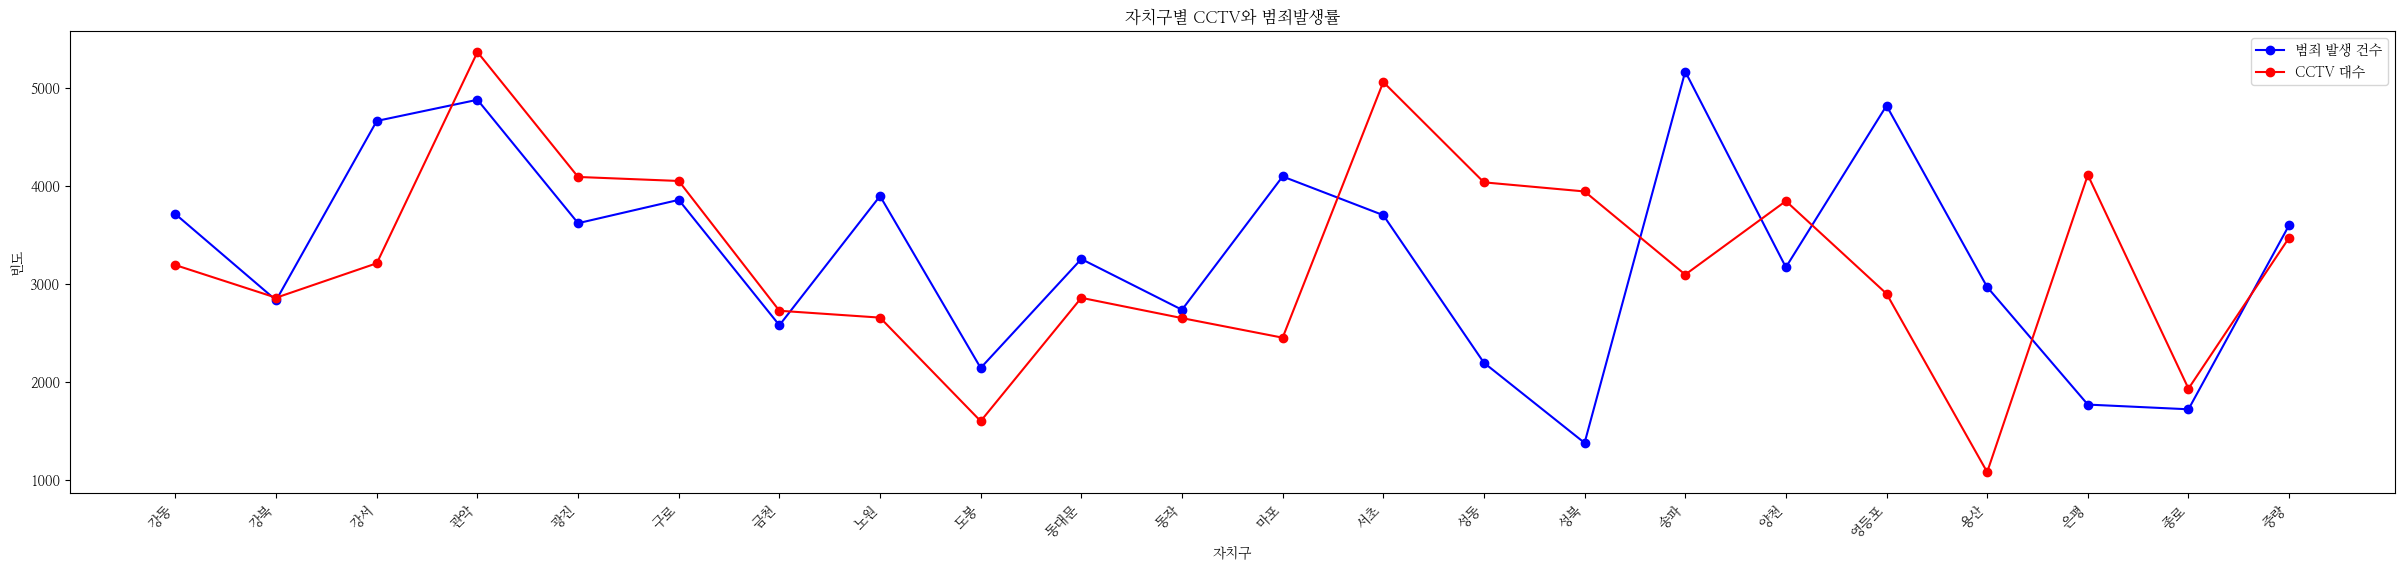

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 교집합에 해당하는 자치구명 추출
common_jachigu = ['중랑', '종로', '은평', '용산', '영등포', '양천', '송파', '성북', '성동', '서초', '마포', '동작', '동대문', '도봉', '노원', '금천', '구로', '광진', '관악', '강서', '강북', '강동']


# 교집합에 해당하는 데이터 추출
df_crime_common = df_crime[df_crime['자치구'].isin(common_jachigu)]

# 자치구별 범죄 발생 건수 계산
grouped_crime = df_crime_common.groupby('자치구')['건수'].sum().reset_index()

# 자치구별 CCTV 대수 추출 (자치구의 개수로 세어줌)
cctv_counts = df[df['자치구'].isin(common_jachigu)]['자치구'].value_counts()

# Plotting
plt.figure(figsize=(30, 6))
plt.title('자치구별 CCTV와 범죄발생률')
plt.xlabel('자치구')
plt.ylabel('빈도')
plt.xticks(rotation=45, ha='right')

# Plotting 범죄 발생 건수
plt.plot(grouped_crime['자치구'], grouped_crime['건수'], marker='o', linestyle='-', color='b', label='범죄 발생 건수')

# Plotting CCTV 대수
plt.plot(cctv_counts.sort_index().index, cctv_counts.sort_index().values, marker='o', linestyle='-', color='r', label='CCTV 대수')

plt.legend()  # 범례 추가
plt.show()



선형회귀를 한 번 해볼게용

In [ ]:
# 교집합 자치구명
city = pd.Series(['강동', '강북', '강서', '관악', '광진',
                 '구로', '금천', '노원', '도봉', '동대문',
                 '동작', '마포', '서초', '성동', '성북',
                 '송파', '양천', '영등포', '용산', '은평',
                 '종로', '중랑' ])

# 범죄 개수
count_of_crime = pd.Series([3711, 2832, 4663, 4879, 3619,
                           3857, 2577, 3896, 2141, 3253,
                           2735, 4096, 3701, 2194, 1376,
                           5167, 3169, 4819, 2967, 1767,
                           1719, 3599])
# cctv 개수
count_of_cctv = pd.Series([3191, 2858, 3210, 5366, 4050,
                           2725, 2725, 2655, 1598, 2857,
                           2650, 2450, 5060, 4036, 3943,
                           3094, 3845, 2899, 1078, 4111,
                           1930, 371])

# 자치구 면적 : 제곱 킬로미터
area = pd.Series([24.59, 23.60,41.45, 29.57, 17.06,
                  20.12, 13.02, 35.44, 20.65, 14.22,
                  16.36, 23.85, 46.97, 16.82, 24.58,
                  33.88, 17.41, 24.55, 21.87, 29.71,
                  23.91, 18.50])



pd.DataFrame({'자치구명': city, '범죄 수':count_of_crime,
                     'cctv수':count_of_cctv, '자치구 면적':area})

# 데이터 프레임 생성
test = pd.DataFrame({'자치구명': city, '범죄 수':count_of_crime,
                     'cctv수':count_of_cctv, '자치구 면적':area})




,자치구명,범죄 수,cctv수,자치구 면적
0,강동,3711,3191,24.59
1,강북,2832,2858,23.60
2,강서,4663,3210,41.45
3,관악,4879,5366,29.57
4,광진,3619,4050,17.06
5,구로,3857,2725,20.12
6,금천,2577,2725,13.02
7,노원,3896,2655,35.44
8,도봉,2141,1598,20.65
9,동대문,3253,2857,14.22


In [ ]:
# 단위 면적당 범죄 수
test_new = df.assign(cctv_area = df['cctv 개수']/df['자치구 면적'],
                     crime_area = test['범죄 수']/test['자치구 면적'])

test_new

,자치구명,범죄 수,cctv 개수,자치구 면적,cctv_area,crime_area
0,강동,3711,3191,24.59,129.768198,150.915006
1,강북,2832,2858,23.60,121.101695,120.000000
2,강서,4663,3210,41.45,77.442702,112.496984
3,관악,4879,5366,29.57,181.467704,164.998309
4,광진,3619,4050,17.06,237.397421,212.133646
5,구로,3857,2725,20.12,135.437376,191.699801
6,금천,2577,2725,13.02,209.293395,197.926267
7,노원,3896,2655,35.44,74.915350,109.932280
8,도봉,2141,1598,20.65,77.384988,103.680387
9,동대문,3253,2857,14.22,200.914205,228.762307


In [ ]:
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(plt.rcParams['font.family'])

['NanumMyeongjo']


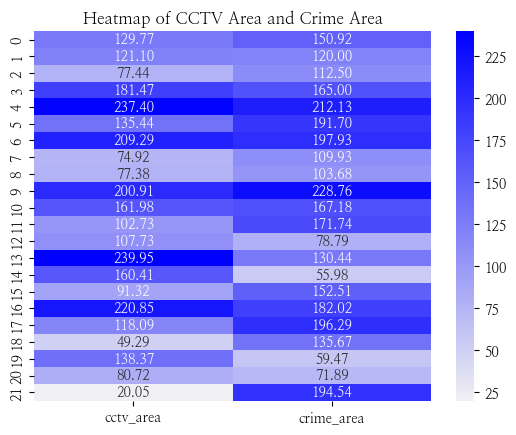

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# 파란색 톤 설정
blue_palette = sns.light_palette("blue", as_cmap=True)

# 'cctv_area'와 'crime_area'에 대한 heatmap 그리기
#sns.heatmap(test_new[['cctv_area', 'crime_area']], cmap=blue_palette, annot=True, fmt=".2f")
#plt.title("Heatmap of CCTV Area and Crime Area")
#plt.show()



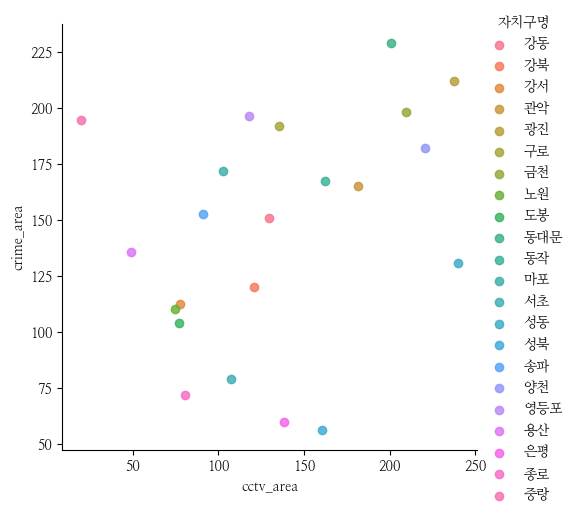

In [ ]:
sns.lmplot(data=test_new, x="cctv_area",
           y="crime_area", hue = "자치구명")

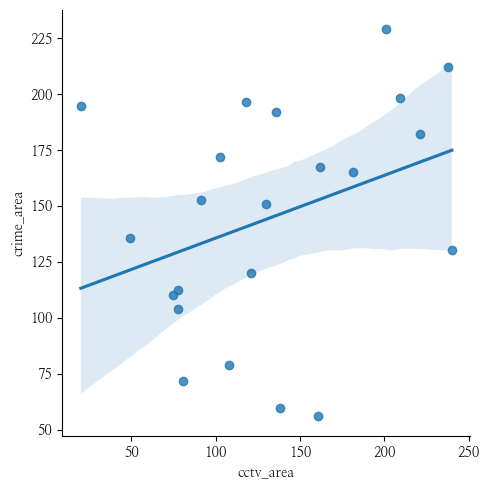

In [ ]:
sns.lmplot(data=test_new, x="cctv_area",
           y="crime_area")